# Data Cleaning with Employee Exit Surveys

In any business, whether great or small, employees always come and go. Rarely does one employee remain with the same company throughout his/her entire career. In this project, we will be working with two datasets containing information about the resignation history of two Australian organizations. The analysis questions we will be answering are:

- Are employees who only worked for the institutes for a short time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The two datasets we will be working with are surveys from the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education#Queensland) (TAFE) Institute in Queensland, Australia. DETE is a governmental organization for compulsory education, while TAFE is an umbrella organization, which overlies the nation’s colleges, or higher education institutes.

Our goal for this short project is to demonstrate deeper skills of data cleaning and how useful they can be when conducting analysis. We will not be diving into deep analysis for this project, since we want to focus more on the data cleaning. Therefore, we will only be conducting an initial analysis after our data cleaning is complete.

Let's begin by importing our libraries and opening/exploring our datasets.

### Initial Exploration

In [49]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [50]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [51]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [52]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [53]:
# Observing the unique values in all the columns in the DETE dataset
for c in dete_survey.columns:
    print("---- %s ---" % c)
    print(dete_survey[c].value_counts(dropna=False))

---- ID ---
ID
823    1
1      1
2      1
3      1
4      1
      ..
11     1
10     1
9      1
8      1
7      1
Name: count, Length: 822, dtype: int64
---- SeparationType ---
SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64
---- Cease Date ---
Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
04/2014         2
08/2012         2
04/2013         2
2014            1
07/2012      

In [54]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [55]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [56]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [57]:
# Observing the unique values in all the columns in the TAFE dataset
for c in tafe_survey.columns:
    print("---- %s ---" % c)
    print(tafe_survey[c].value_counts(dropna=False))

---- Record ID ---
Record ID
6.350730e+17    1
6.341330e+17    1
6.341337e+17    1
6.341388e+17    1
6.341399e+17    1
               ..
6.341779e+17    1
6.341771e+17    1
6.341770e+17    1
6.341761e+17    1
6.341726e+17    1
Name: count, Length: 702, dtype: int64
---- Institute ---
Institute
Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: count, dtype: int64
---- WorkArea ---
WorkArea
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: count, dtype: int64
---- CESSATION YEAR --

In the code above, we used the `.head()`, `.info()`, `value_counts()`, and `.isnull()` methods to explore and get an overview of our datasets. As we study the results above, we can see that the DETE dataset contains 5 rows and 56 columns, and the TAFE dataset contains 5 rows and 72 columns. Another thing we notice about both datasets is the empty or missing values. Several rows in each dataset have a significant amount of null values, specifically the `Aboriginal`, `Torres Strait`, and `South Sea` columns in the DETE dataset, and the `Main Factor. Which of these was the main factor for leaving?` column in the TAFE dataset. In DETE, 'Not Stated' is often used to show null vlaues instead of 'NaN'. Lastly, The TAFE dataset's column names are quite long, and cumbersome to use.

Below, we will perform several series of code, to correct some of the issues described above. First, we will re-enter the DETE dataset into our project, this time specifying the string 'Not Stated' as a null value, to be marked as 'NaN'. This ensures that when we are looking for null values, they all are marked universally the same way. Next, based on our analysis questions, we will drop those columns from each dataset that is not useful or needed in our analysis.

### DETE Correction

In [58]:
# Re-reading 'dete_survey.csv' to correct the null value identification
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [59]:
# Dropping columns uneeded for analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Now, we will move on to correcting column names. In both datasets, there are columns that contain similar information, but with different column names. Or there are column names with unnecessary spaces, words, or capitalization. Since we will eventually combine our datasets, our analysis will go much smoother with uniform column names.

### Renaming Columns

In [60]:
# Cleaning DETE dataset column names
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower()

In [61]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [62]:
# Cleaning TAFE dataset column names
mapping = {
	'Record ID': 'id', 
	'CESSATION YEAR': 'cease_date', 
	'Reason for ceasing employment': 'separationtype', 
	'Gender. What is your Gender?': 'gender', 
	'CurrentAge. Current Age': 'age', 
	'Employment Type. Employment Type': 'employment_status', 
	'Classification. Classification': 'position', 
	'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
	'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

In [63]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The code above uses a string of methods to correct the `dete_survey_updated` column names. To fix the `tafe_survey_updated` column names, we used a dictionary within the `.rename()` method. Lastly, using the `.head()` method once again, we can see that both the datasets share matching column names.

Now that we have corrected the column names, we are going to continue to remove data from the datasets that will not be useful to us in our analysis. While this data is not useless in the sense of having no value entirely, it is simply not needed for the specific direction of our analysis in this project. In the code below, we will look at the unique values of the `separationtype` columns in both datasets, to begin to find ways to narrow down our data.

### Dropping Unneeded Data

In [64]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [65]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

From the results above, we can see that there are several separation types for both DETE and TAFE. Remember one of our analysis questions for this project:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

With this in mind, we will keep only the rows that have "Resignation" as the separation type. For the DETE dataset, there are three sections of the "Resignation" separation type, all of which we will combine, then keep. Below, we will use the `.copy()` method to make a copy of our dataset before removing the unneeded rows, so as to avoid any code errors. Then we will select the rows that have the correct separation type.

In [66]:
# Combining the three DETE 'Resignation' separation type columns
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Copying the datasets, to avoid error
dete_resignations = dete_survey_updated.copy()
tafe_resignations = tafe_survey_updated.copy()

# Selecting rows with the correct separation type
dete_resignations = dete_resignations[dete_resignations['separationtype'] == 'Resignation']
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'] == 'Resignation']

In [67]:
dete_resignations['separationtype'].value_counts()

separationtype
Resignation    311
Name: count, dtype: int64

In [68]:
tafe_resignations['separationtype'].value_counts()

separationtype
Resignation    340
Name: count, dtype: int64

Above, we have accomplished sifting through the data based on the separation type. To be sure we were successful, we used the `.value_counts()` method once again, to identify the unique values in our columns.

While we are on the subject of verification, we will take this time to verify other areas of our data to ensure that there is no incorrect data. Sometimes data cleaning processes can cause data to become incorrect, or there is simply incorrect data in the first place. Either way, incorrect data can cause major problems in analysis and needs to be taken care of beforehand.

Next, we will examine and clean the 'cease_date' column in `dete_resignations`. Some strings in the column contain only the year, while others include the month. Using the `.value_counts()` method and vectorized string methods, we will extract the year from each string in the column in the code below.

### Further Data Cleaning and Verification

In [69]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [70]:
# Extracting the year value from each string in the 'cease_date' column
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

Now that we have corrected the data above to be uniform throughout, we can move on to examining and verifying the other date columns. There are two date columns in DETE, 'cease_date' and 'dete_start_date', and one in TAFE, 'cease_date'. While we are looking for any errors in general, we are also making sure to look closely for outliers, data that is out of place. In this case, outliers would look like years that are randomly, and unreasonably high or low.

In [71]:
dete_resignations['cease_date'].value_counts().sort_index()

cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

In [72]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [73]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: count, dtype: int64

In observing our results above, we can see that there are no drastic outliers and that everything seems to be in order. With the verification of these columns complete, we will move on to using them to determine the amount of time employees worked at the DETE and TAFE organizations. This is referred to as their years of service and is recorded in the 'institute_service' column in the TAFE dataset. The DETE dataset, however, does not have a column with this information, posing us with a problem. Seeing as one of our analysis questions has to do with the amount of time an employee worked with the organization, we must have the 'institute_service' information for both the TAFE and DETE columns.

To solve this problem, we will simply create a new 'institute_service' column within the DETE dataset. We will use the information in the 'dete_start_date' and 'cease_date' columns to calculate how long the employee served and form our column's data from the results.

### The 'institute_service' Column

In [74]:
# Calculating the values for the 'institute_service' column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

To create our column above, we simply subtracted the 'dete_start_date' values from the 'cease_date' values, using the resulting values for our new 'institute_service' column. We also used the `.head()` method to review the first few rows of our new column to ensure the calculations had gone correctly.

With our data corrected and verified, we can now move on to the first stages of our analysis. Both of the analysis questions that we will end up answering have to do with the dissatisfaction of the employee. Before we can answer those questions we need to sift out those employees who resigned due to dissatisfaction. In both datasets, some columns answer if employees were dissatisfied for one reason or another. These are:

- TAFE
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
- DETE
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

Whether it is dissatisfaction with the workload, the department, or the work location, all of these contribute to our organizing of those who resigned. In the code below, we will categorize each resignation as one of dissatisfaction or not. Then we will create a new column, 'dissatisfied', labeling each row as 'True' (dissatisfied), 'False' (not dissatisfied), or 'NaN' (the values are missing).

### Cleaning The 'Contributing Factors' Columns & Creating the 'dissatisfied' Columns

In [75]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [76]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

In [77]:
# Defining our custom function to calculate and categorize resignations
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [78]:
# Separating the dissatisfied resignations from the TAFE dataset
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].map(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      99
Name: count, dtype: int64

In [79]:
# Separating the dissatisfied resignations from the DETE dataset
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                       'physical_work_environment', 'lack_of_recognition', 
                                                       'lack_of_job_security', 'work_location', 
                                                       'employment_conditions', 'work_life_balance', 
                                                       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

As you can see above, we utilized our custom `update_vals()` method to categorize all resignations as either caused by dissatisfaction or not. With this completed, we can move on to our next step towards analysis: combining our datasets.

### Combining the Datasets

Since our final analysis answers will be based on results from both datasets, it makes sense to combine them. By combining them, we save ourselves the trouble of conducting calculations twice. In the code below we will first create a new column in each dataset, to help us distinguish what dataset each column originally belonged to. Then we will proceed to combine the datasets themselves.

In [80]:
# Adding the 'institute' column to the DETE dataset
dete_resignations_up['institute'] = 'DETE'

In [81]:
# Adding the 'institute' column to the TAFE dataset
dete_resignations_up['institute'] = 'TAFE'

In [82]:
# Combining the datasets
combined = pd.concat([dete_resignations_up, dete_resignations_up], ignore_index=True)

In [83]:
# Verifying that the combining was successful
combined.notnull().sum().sort_values()

torres_strait                            0
south_sea                                6
aboriginal                              14
disability                              16
nesb                                    18
business_unit                           64
classification                         322
region                                 530
role_start_date                        542
institute_service                      546
dete_start_date                        566
cease_date                             600
gender                                 604
age                                    612
employment_status                      614
position                               616
physical_work_environment              622
dissatisfaction_with_the_department    622
job_dissatisfaction                    622
interpersonal_conflicts                622
lack_of_recognition                    622
lack_of_job_security                   622
work_location                          622
employment_

After adding a new column to both DETE and TAFE, we successfully combined them into one large dataset, as can be seen from the verification above. However, in studying the verification results, we can see that there are still several columns that contain information not necessary to our analysis. In the code below, we will proceed to drop the rest of this unneeded data.

### Dropping Unneeded Data & Verification

In [84]:
# Dropping unneeded data: data containing less than 500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

With the datasets combined, we are just about ready to start answering our analysis questions. However, since much of our analysis is based on the 'institute_service' column, we will look it over once more, in the code below, to make sure everything looks as it should.

In [85]:
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
NaN     76
5.0     46
1.0     44
0.0     40
3.0     40
6.0     34
4.0     32
9.0     28
2.0     28
7.0     26
8.0     16
13.0    16
20.0    14
15.0    14
10.0    12
14.0    12
17.0    12
12.0    12
22.0    12
16.0    10
18.0    10
23.0     8
24.0     8
11.0     8
19.0     6
32.0     6
39.0     6
21.0     6
30.0     4
26.0     4
36.0     4
25.0     4
28.0     4
35.0     2
38.0     2
49.0     2
33.0     2
27.0     2
41.0     2
42.0     2
29.0     2
34.0     2
31.0     2
Name: count, dtype: int64

As we can see from the results above, everything is uniform and reliable. With the 'institute_service' column verified for any inconsistencies, we will now organize it into sections that will aid our later analysis. Roughly based upon the ideas in [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), we will split the 'institute_service' values into the following categories:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Using a custom method we will create in the code below, we will sift through the 'institute_service' column, assigning the appropriate value to each row. In doing this, we make it much easier to idenify the answer to our analysis questions later.

### Categorizing Years of Service

In [86]:
# Creating a function to categorize the 'institute_service' data
def categorize(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return "New"
    elif 3 <= x < 7:
        return "Experienced"
    elif 7 <= x < 11:
        return "Established"
    elif x >= 11:
        return "Veteran"

# Applying our function to the 'institute_service' column
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)

# Verifying the 'service_cat' column
combined_updated['service_cat'].value_counts(dropna=False)

service_cat
Veteran        200
Experienced    152
New            112
Established     82
NaN             76
Name: count, dtype: int64

Now that we have readied the years of service for analysis, we will move on to our last few tasks of cleaning. First, we will confirm the number of 'True' and 'False' values in the 'dissatisfied' column, by using the `value_counts()` method below.

In [87]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    324
True     298
Name: count, dtype: int64

Since there are no null values numbered in the results above, we will move on to calculate the percentage of employees that were dissatisfied in each category we previously created in the 'service_cat' column. To do this we will use the `DataFrame.pivot_table()` method to calculate the percentages. Then, we will plot our results on a bar graph, using the `%matplotlib` inline to cause our graph to show in this notebook.

### Generating Bar Graph for Analysis

Text(0, 0.5, 'Dissatisfaction')

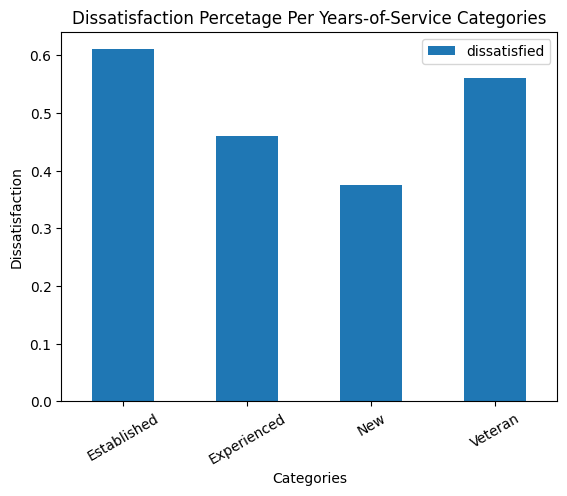

In [88]:
# Calculating the percentages and combining them in a dataframe
percentage = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

# Using Matplotlib to plot the relationship in a bar graph
%matplotlib inline
visual = percentage.plot(kind='bar', rot=30)
visual.set_title('Dissatisfaction Percetage Per Years-of-Service Categories')
visual.set_xlabel('Categories')
visual.set_ylabel('Dissatisfaction')

### Initial analysis

As a reminder, our two analysis questions to answer from the results above are:

- Are employees who only worked for the institutes for a short time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

From our earlier data cleaning maneuvers, we can confidently confirm that a large percentage of employees are resigning due to dissatisfaction. Our resulting bar graph above shows that the categories with more years of service in the organization have significantly more dissatisfaction-based resignations. This also confirms that employees older in age are also resigning due to dissatisfaction since they logically are older having spent so many years at the organization.

Now let’s turn to younger employees and those with fewer years of service. They too have instances of dissatisfaction-based resignations. These instances, however, make up less than 50% of all resignations for these employees. Therefore, we can conclude that younger and/or less experienced employees are less likely to resign due to dissatisfaction than those employees who are older and/or more experienced.

### Conclusion

In this project, we have demonstrated the skills of using deeper data cleaning methods such as `.strip()`, `.split()`, `.replace()`, `.rename()`, `.map()`, and `.any()`. We also used the techniques of stringing methods and defining our own functions. Lastly, we demonstrated the benefits of combining datasets when conducting analysis. Knowing how to use these skills to one's advantage is crucial when managing an analysis, especially when more than one dataset is involved. The more comfortable a Data Scientist or Analyst is with data, the more valuable they become to any company.